# Search in your website

I will integrate a search engine into the website I developed for my BSc final project.

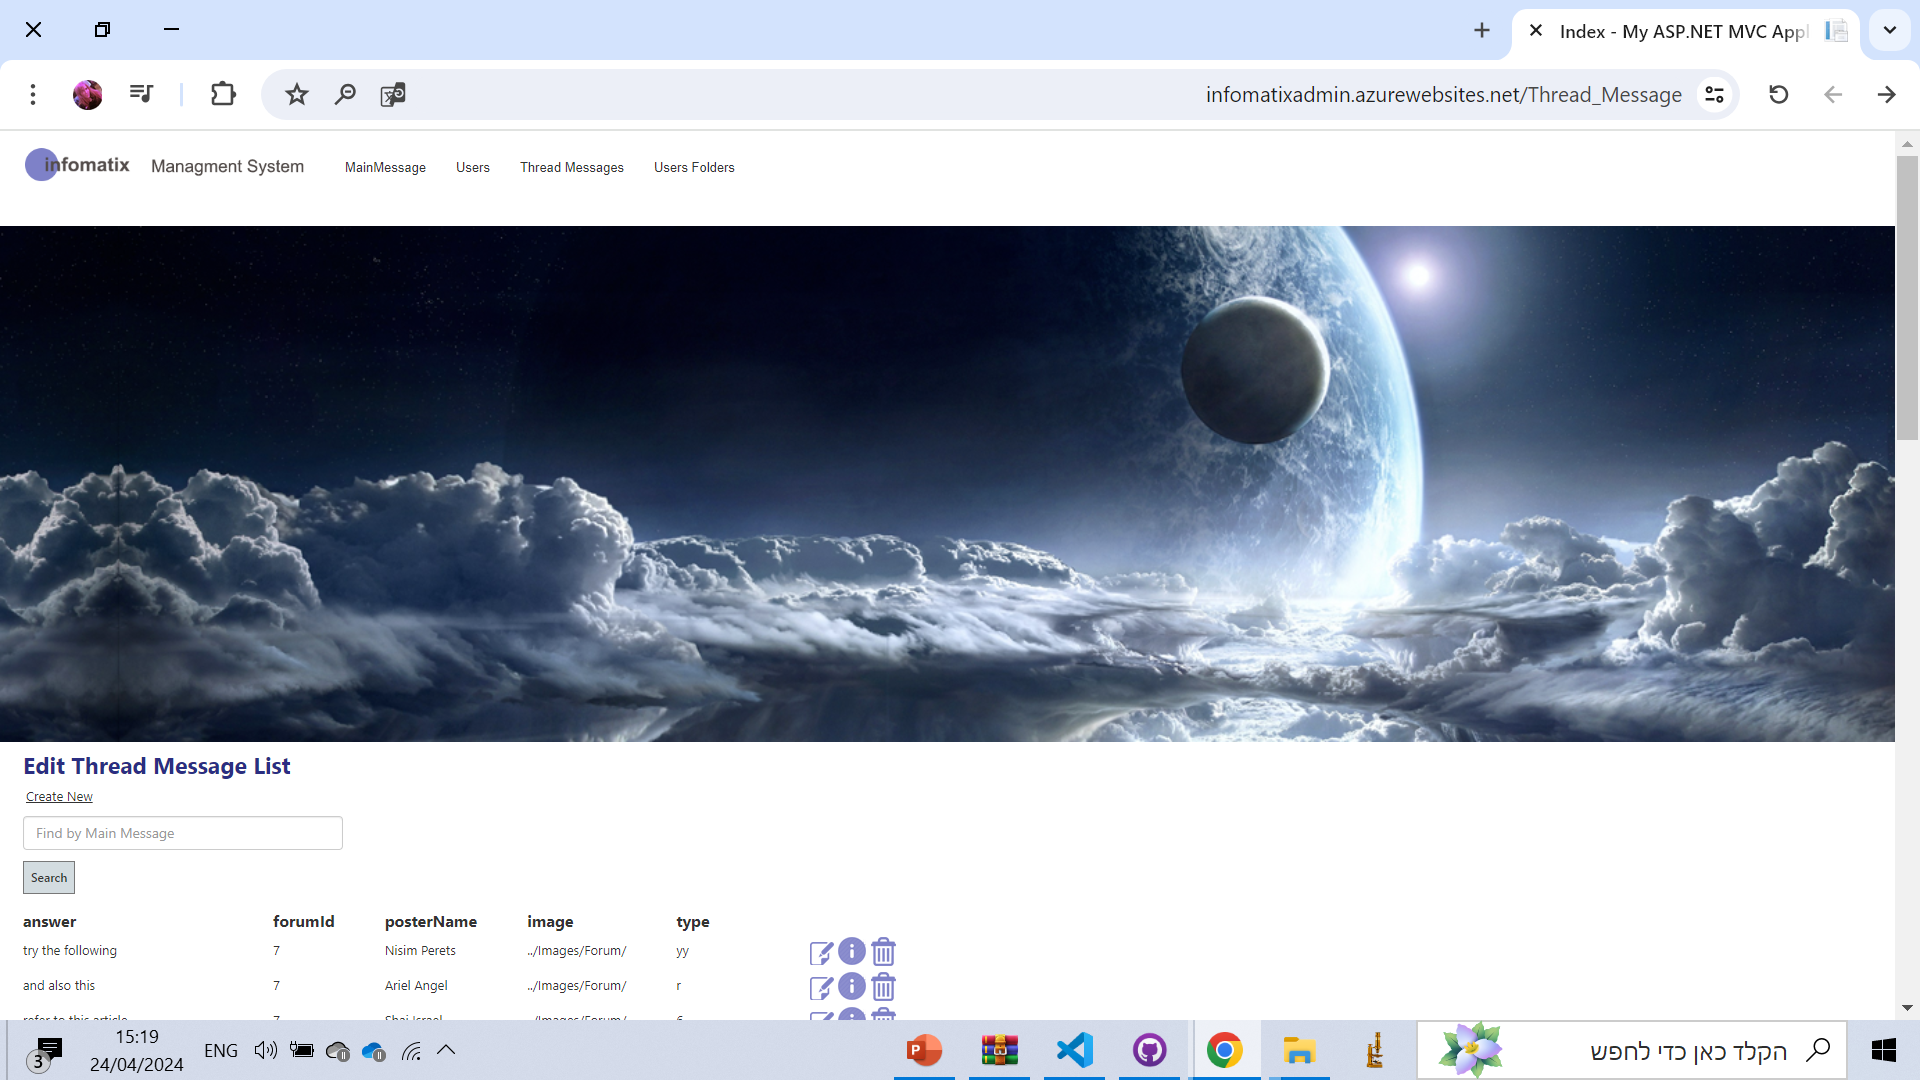

# Installs

In [1]:
!pip install --upgrade --quiet  nest_asyncio
!pip install --upgrade langchain
!pip install git+https://github.com/neuml/txtai#egg=txtai[graph]

# Install translation pipeline dependencies for later examples
!pip install sentencepiece sacremoses fasttext
!pip install txtai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.3/291.3 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
DEPRECATION: git+https://github.com/neuml/txtai#egg=txtai[graph] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at

# Initially, I retrieve the website's sitemap.xml file from Git, which can be generated using tools like https://www.xml-sitemaps.com/.

In [2]:
import requests
from pathlib import Path

image_url = "https://github.com/liatdavid2/my_custom_datasets/raw/main/sitemap_infomatix.xml"
image_name = image_url.split('/')[-1]
# Setup custom image path
data_path = Path("")
custom_image_path = data_path / image_name
print(custom_image_path)

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get(image_url)
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

sitemap_infomatix.xml


In [80]:
# Get website data - from react website - need to check

# fixes a bug with asyncio and jupyter
import nest_asyncio

nest_asyncio.apply()

from langchain_community.document_loaders.sitemap import SitemapLoader
WEBSITE_URL = "sitemap_infomatix.xml"

sitemap_loader = SitemapLoader(web_path=WEBSITE_URL,is_local=True)
#sitemap_loader = SitemapLoader(web_path=WEBSITE_URL)
docs = sitemap_loader.load()
print(docs[1])

Fetching pages: 100%|##########| 383/383 [00:08<00:00, 46.00it/s]


page_content='\n\n\n\nIndex - My ASP.NET MVC Application\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMainMessage\nUsers\nThread Messages\nUsers Folders\n\n\n\n\n\n\n\n\n\n\nEdit Users List\n\nCreate New\n\n \n\n\n \n\n\r\n                name\r\n            \n\r\n                password\r\n            \n\r\n                email\r\n            \n\r\n                user_type\r\n            \n\r\n                image\r\n            \n\n\n\n\r\n                    Nisim Perets\r\n                \n\r\n                    Nisim\r\n                \n\r\n                    Nisim@gmail.com\r\n                \n\r\n                    user\r\n                \n\r\n                    ../Images/Forum/Nisim.jpg\r\n                \n\nEdit\n\n\nDetails\n\n\nDelete\n\n\n\n\r\n                    Micaela Glat\r\n                \n\r\n                    Micaela\r\n                \n\r\n                    Micaela@gmail.com\r\n                \n\r\n                    user\r\n      

# Cut the full doc into chunks of 15 words

In [77]:
str_page_content = []
doc_url = []

for doc in docs:

  words = doc.page_content.split()
  #print(words[4])
  for i in range(0,len(words),15):
      str_page_content.append(" ".join(words[i:i+15]))
      doc_url.append(doc.metadata['source'])
print(str_page_content)
print(doc_url)

['Main Message - My ASP.NET MVC Application MainMessage Users Thread Messages Users Folders Edit Main', 'Messages Create New question name type id how to check genes for hight? Hadas Tsivion', 'Genome 7 Edit Details Delete Why is drosophila a convenient animal for studying linked genes?', 'Nisim Perets Genome 8 Edit Details Delete what is the difference between parental gametes and', 'recombinant gametes? Micaela Glat Genome 10 Edit Details Delete what is the coding of eye', 'color genes? Nisim Perets Genome 11 Edit Details Delete expression of a fungal protein sequence', 'containing signal peptide in E coli. will be successful or not? Micaela Glat research 12', 'Edit Details Delete how can I visualize all transcripts of a gene in order to', 'determine the longest one (ex. BRCA1) ? Ben Weiner RNA 22 Edit Details Delete Is', 'it necessary a linker for knock-in GFP using CRISPR? Micaela Glat research 23 Edit Details', "Delete I want to construct a cell model about Alzheimer's Disease, bu

# Semantic search

Embeddings databases are the engine that delivers semantic search. Data is transformed into embeddings vectors where similar concepts will produce similar vectors. Indexes both large and small are built with these vectors. The indexes are used to find results that have the same meaning, not necessarily the same keywords.

The basic use case for an embeddings database is building an approximate nearest neighbor (ANN) index for semantic search. The following example indexes a small number of text entries to demonstrate the value of semantic search.

In [78]:
%%capture

from txtai import Embeddings

# Works with a list, dataset or generator

data = str_page_content
print(data)
# Create an embeddings
embeddings = Embeddings(path="sentence-transformers/nli-mpnet-base-v2")

# For every search word or sentence, fetch the top 5 results along with their respective URLs.

In [79]:
# Create an index for the list of text
embeddings.index(data)


# Run an embeddings search for each query
for query in ("cancer", "diseases", "virus", "fly", "chromosome", "protein", "dna", "polio"):
  # Extract uid of first result
  # search result format: (uid, score)
  uids = embeddings.search(query, 5)
  print('\n----------Top 5 words for search word: ',query,'--------------------\n')
  for i in range(len(uids)):
      print(data[uids[i][0]])
      print(doc_url[uids[i][0]])


----------Top 5 words for search word:  cancer --------------------

curing cancer posterName Nisim Perets image ../Images/Forum/ type DNA | Back to List © 2024
http://infomatixadmin.azurewebsites.net/Thread_Message/Delete/36
is the key to curing cancer 69 Nisim Perets ../Images/Forum/ DNA Edit Details Delete refer
http://infomatixadmin.azurewebsites.net/Thread_Message
69 answer this is the key to curing cancer posterName Nisim Perets image ../Images/Forum/ type
http://infomatixadmin.azurewebsites.net/Thread_Message/Details/36
to:http://chemocare.com/chemotherapy/side-effects/anxiety-and-cancer.aspx 38 Ben Weiner ../Images/Forum/ r Edit Details Delete he meant eye color,not height 11
http://infomatixadmin.azurewebsites.net/Thread_Message
Nisim Perets type Therapy question What side affects of chemo have you seen? Edit |
http://infomatixadmin.azurewebsites.net/MainMessage/Details/40

----------Top 5 words for search word:  diseases --------------------

changes in anatomical pathology?